## Importing the Dependincies

In [758]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import math
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from matplotlib import pyplot
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb

## Read data set

In [759]:
myData = pd.read_csv('training_set_features.csv')
myData.head()
y_data = pd.read_csv('training_set_labels.csv')
Y1 = y_data['h1n1_vaccine']
Y2 = y_data['seasonal_vaccine']

In [760]:
print(myData.shape)
print("duplicated:" + str(myData.duplicated().sum()))
print("-----------")
print("NUM OF NULL")
print("-----------")
print(myData.isna().sum().sort_values(ascending=False))

(26707, 36)
duplicated:0
-----------
NUM OF NULL
-----------
employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_children               249
household_adults                 249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_lar

In [761]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

## Label Encoding & One-Hot Encoding & Null handling & Future Selection

In [762]:
print("--------------------marital_status--------------")
print(pd.value_counts(myData.marital_status))
print("Null      " + str(myData['marital_status'].isna().sum()))

print("--------------------employment_status--------------")
print(pd.value_counts(myData.employment_status))
print("Null      " + str(myData['employment_status'].isna().sum()))

myData = myData.drop(["health_insurance","employment_industry","employment_occupation"], axis=1) #too many missing values

--------------------marital_status--------------
Married        13555
Not Married    11744
Name: marital_status, dtype: int64
Null      1408
--------------------employment_status--------------
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64
Null      1463


In [763]:
print("--------------------marital_status--------------")
myData['marital_status'] = myData['marital_status'].fillna(myData['marital_status'].mode()[0])
print(pd.value_counts(myData.marital_status))
print("Null      " + str(myData['marital_status'].isna().sum()))

print("--------------------employment_status--------------")
myData['employment_status'] = myData['employment_status'].fillna("Unemployed")
myData['employment_status'] = myData['employment_status'].str.replace('Not in Labor Force','Unemployed')
print(pd.value_counts(myData.employment_status))
print("Null      " + str(myData['employment_status'].isna().sum()))

#... others
# Çoğunlukla mod kullanmamın sebebi çok spesifik şeyler veya öznel cevaplar olması. 
# Ayrıca bazılarındaki null sayısının düşük olmasından dolayı onlarıda mode ile yaptım 
myData['income_poverty'] = myData['income_poverty'].fillna('unknown')
myData['household_children'].fillna(myData['household_children'].mean(),inplace=True)
myData['doctor_recc_h1n1'] = myData['doctor_recc_h1n1'].fillna(myData['doctor_recc_h1n1'].mode()[0])
myData['doctor_recc_seasonal'] = myData['doctor_recc_seasonal'].fillna(myData['doctor_recc_seasonal'].mode()[0])
myData['rent_or_own'].fillna(myData.get('rent_or_own').value_counts().index[1],inplace=True)
myData['education'].fillna('< 12 Years',inplace=True)
myData['child_under_6_months'].fillna(0,inplace=True)
myData['health_worker'].fillna(0,inplace=True)
myData['chronic_med_condition'].fillna(myData['chronic_med_condition'].mode()[0],inplace=True)
myData['opinion_seas_sick_from_vacc'].fillna(myData['opinion_seas_sick_from_vacc'].mode()[0],inplace=True)
myData['opinion_seas_risk'].fillna(myData['opinion_seas_risk'].mode()[0],inplace=True)
myData['opinion_seas_vacc_effective'].fillna(myData['opinion_seas_vacc_effective'].mode()[0],inplace=True)
myData['opinion_h1n1_sick_from_vacc'].fillna(myData['opinion_h1n1_sick_from_vacc'].mode()[0],inplace=True)
myData['opinion_h1n1_vacc_effective'].fillna(myData['opinion_h1n1_vacc_effective'].mode()[0],inplace=True)
myData['opinion_h1n1_risk'].fillna(myData['opinion_h1n1_risk'].mode()[0],inplace=True)
myData['household_adults'].fillna(myData['household_adults'].mode()[0],inplace=True)
myData['behavioral_avoidance'].fillna(myData['behavioral_avoidance'].mode()[0],inplace=True)
myData['behavioral_touch_face'].fillna(myData['behavioral_touch_face'].mode()[0],inplace=True)
myData['h1n1_knowledge'].fillna(myData['h1n1_knowledge'].mode()[0],inplace=True)
myData['h1n1_concern'].fillna(myData['h1n1_concern'].mode()[0],inplace=True)
myData['behavioral_large_gatherings'].fillna(myData['behavioral_large_gatherings'].mode()[0],inplace=True)
myData['behavioral_outside_home'].fillna(myData['behavioral_outside_home'].mode()[0],inplace=True)
myData['behavioral_antiviral_meds'].fillna(myData['behavioral_antiviral_meds'].mode()[0],inplace=True)
myData['behavioral_wash_hands'].fillna(myData['behavioral_wash_hands'].mode()[0],inplace=True)
myData['behavioral_face_mask'].fillna(myData['behavioral_face_mask'].mode()[0],inplace=True)

--------------------marital_status--------------
Married        14963
Not Married    11744
Name: marital_status, dtype: int64
Null      0
--------------------employment_status--------------
Employed      13560
Unemployed    13147
Name: employment_status, dtype: int64
Null      0


In [764]:
martial_onehot = {'Married' : 1 , 'Not Married' : 0}
sex_onehot = {'Female' : 1 , 'Male' : 0}
race_onehot = {'White' : 3 , 'Black' : 2 , 'Other or Multiple': 1 , 'Hispanic': 0}
census_msa_onehot = {'MSA, Principle City': 2 , 'Non-MSA': 1 , 'MSA, Not Principle  City':0}
hhs_geo_region_onehot = {'lzgpxyit': 9 , 'dqpwygqj':8 , 'kbazzjca':7, 'bhuqouqj':6 , 'mlyzmhmf':5, 'atmpeygn':4, 'lrircsnp':3, 'qufhixun':2,'fpwskwrf':1, 'oxchjgsf':0}


rent_or_own_label = {'Own' : 1 , 'Rent' : 0}
employment_status_label = {'Employed' : 1 , 'Unemployed' : 0}
poverty_label = {'<= $75,000, Above Poverty': 0 , 'unknown': 1 , 'Below Poverty':2, '> $75,000':3}
age_group_label = {'45 - 54 Years': 0 , '18 - 34 Years': 1 , '55 - 64 Years':2, '35 - 44 Years':3, '65+ Years':4}
education_label = {'Some College': 0 , '12 Years': 1 , 'College Graduate':2, '< 12 Years':3}



myData['marital_status'] = [martial_onehot[i] for i in myData.get('marital_status')]
myData['sex'] = [sex_onehot[i] for i in myData.get('sex')]
myData['race'] = [race_onehot[i] for i in myData.get('race')]
myData['census_msa'] = [census_msa_onehot[i] for i in myData.get('census_msa')]
myData['hhs_geo_region'] = [hhs_geo_region_onehot[i] for i in myData.get('hhs_geo_region')]

myData['rent_or_own'] = [rent_or_own_label[i] for i in myData.get('rent_or_own')]
myData['employment_status'] = [employment_status_label[i] for i in myData.get('employment_status')]
myData['income_poverty'] = [poverty_label[i] for i in myData.get('income_poverty')]
myData['age_group'] = [age_group_label[i] for i in myData.get('age_group')]
myData['education'] = [education_label[i] for i in myData.get('education')]


In [765]:
myData.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,1,2,0,1,0,0,1,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,0,2,0,0,1,6,0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,0,0,0,1,1,2,0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,1,2,0,0,0,3,2,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,1,0,1,1,1,2,0,1.0,0.0


In [766]:
print("NUM OF NULL")
print("-----------")
print(myData.isna().sum().sum())

NUM OF NULL
-----------
0


In [767]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

<AxesSubplot:>

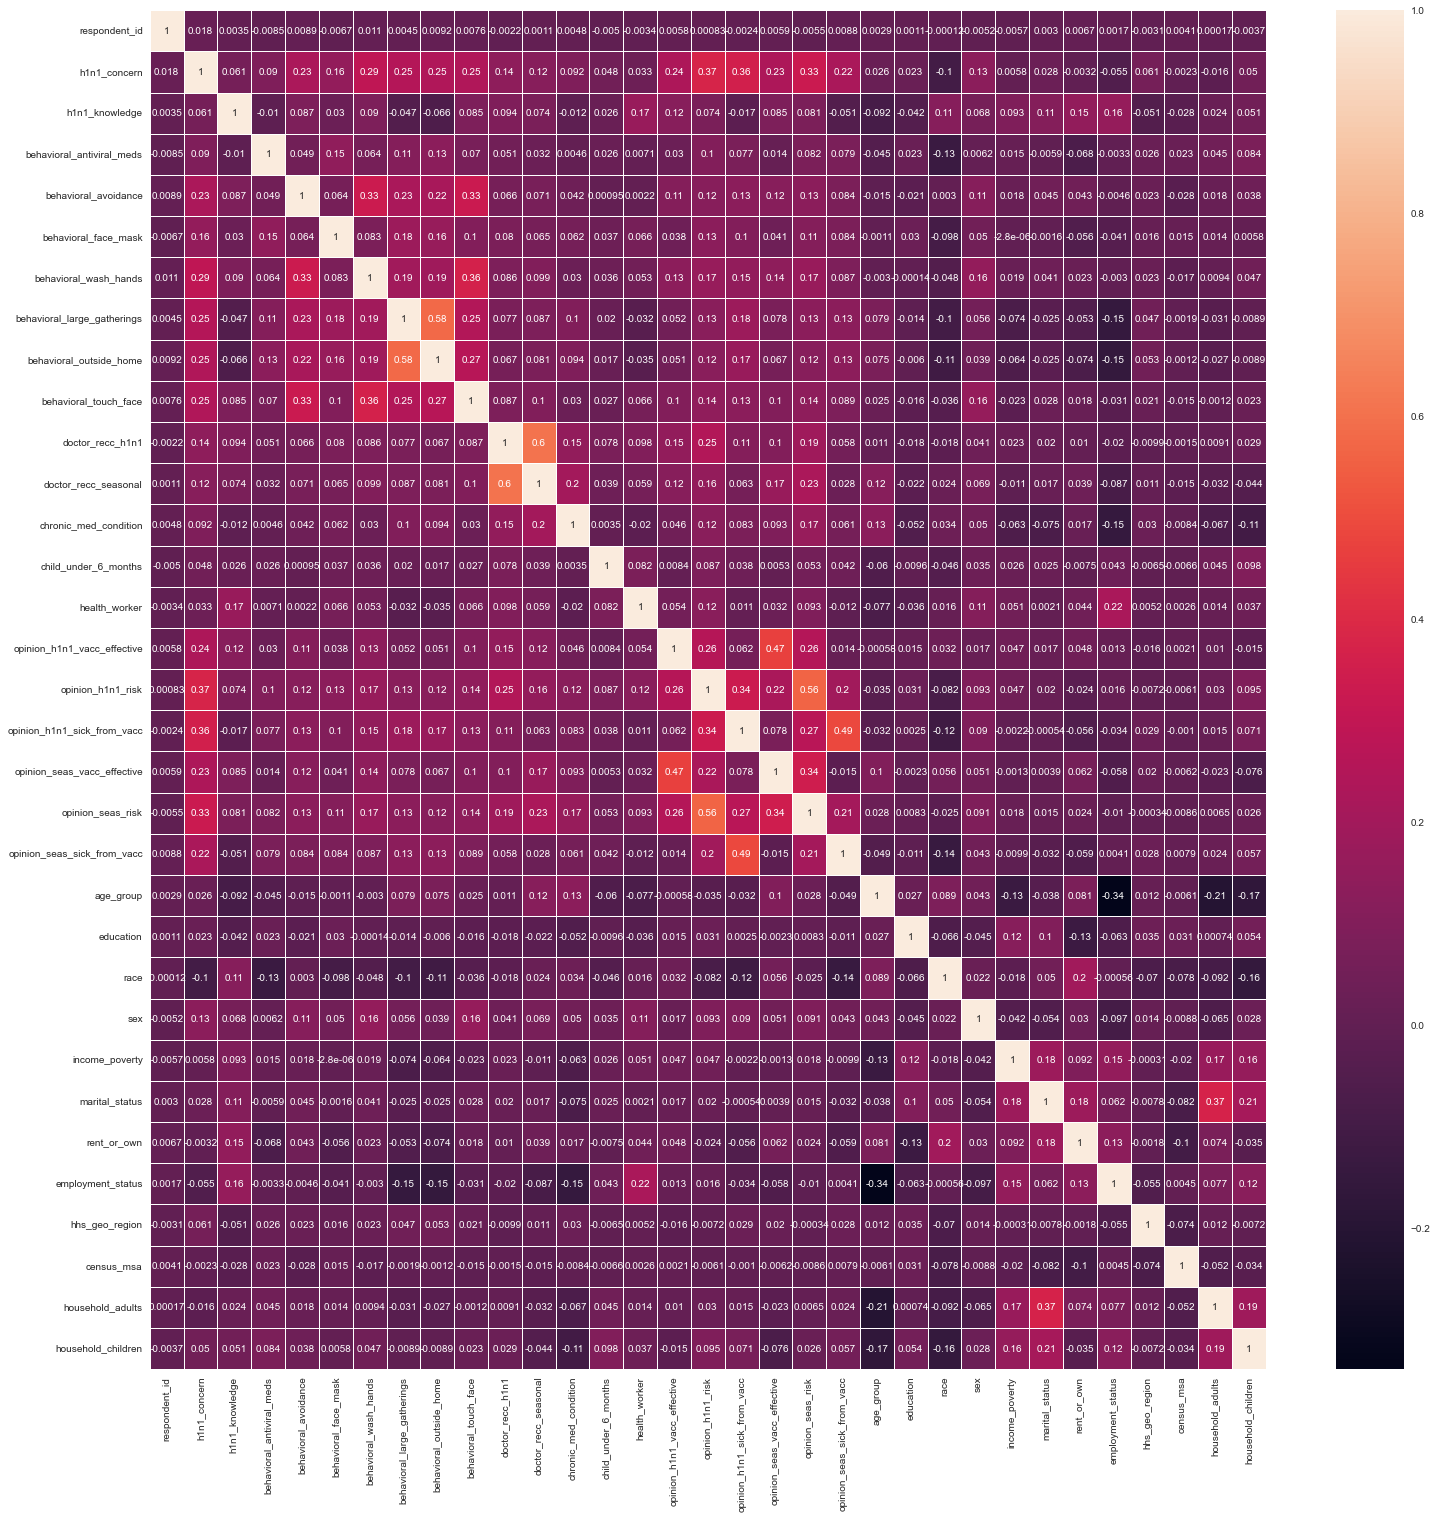

In [768]:
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(myData.corr(), linewidths = 1, annot = True)

### Normalizing Data

In [769]:
del myData['respondent_id']
myData.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,1,2,0,1,0,0,1,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,0,2,0,0,1,6,0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,0,0,1,1,2,0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,1,2,0,0,0,3,2,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,1,0,1,1,1,2,0,1.0,0.0


In [770]:
scaler = preprocessing.MinMaxScaler()
myData = pd.DataFrame(scaler.fit_transform(myData))
myData.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.666667,0.0,1.0,0.0,0.000000,0.5,0.000000,0.0
1,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.666667,0.0,0.0,1.0,0.666667,0.0,0.000000,0.0
2,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000000,0.0,1.0,1.0,0.222222,0.0,0.666667,0.0
3,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.666667,0.0,0.0,0.0,0.333333,1.0,0.000000,0.0
4,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.000000,1.0,1.0,1.0,0.222222,0.0,0.333333,0.0


### Splitting Data

In [771]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(myData,Y1,test_size=0.1,stratify=Y1,random_state=1)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(myData,Y2,test_size=0.1,stratify=Y1,random_state=1)

In [772]:
print(myData.shape, X_train1.shape, X_test1.shape)
print(myData.shape, X_train2.shape, X_test2.shape)

(26707, 32) (24036, 32) (2671, 32)
(26707, 32) (24036, 32) (2671, 32)


# Training Model

## -SVM

In [773]:
cclassifier = svm.SVC(kernel='linear')
classifier2 = svm.SVC(kernel='linear')

In [774]:
cclassifier.fit(X_train1,Y_train1)

SVC(kernel='linear')

In [775]:
classifier2.fit(X_train2,Y_train2)

SVC(kernel='linear')

#### model1

In [776]:
X_train1_prediction = cclassifier.predict(X_train1)
trained_data_acc = accuracy_score(X_train1_prediction, Y_train1)

X_test1_prediction = classifier.predict(X_test1)
test_data_acc = accuracy_score(X_test1_prediction, Y_test1)

In [777]:
print('confusion_matrix train-1')
m1 = metrics.confusion_matrix(pd.Series(Y_train1.values.tolist()),pd.Series(X_train1_prediction))
print(m1,"\n")
print('Accuary score: ', trained_data_acc)
print('F1 score: ', f1_score(Y_train1,X_train1_prediction,average="weighted"))

confusion_matrix train-1
[[17626  1303]
 [ 2827  2280]] 

Accuary score:  0.828174405059078
F1 score:  0.8164321780316416


In [778]:
print('confusion_matrix test-1')
m2 = metrics.confusion_matrix(pd.Series(Y_test1.values.tolist()),pd.Series(X_test1_prediction))
print(m2)
print()
print('Accuary score: %.3f '% test_data_acc)
print('F1 score: %.3f '% f1_score(Y_test1,X_test1_prediction,average="weighted"))
print('Precision: %.3f' % precision_score(Y_test1, X_test1_prediction))
print('Recall: %.3f' % recall_score(Y_test1, X_test1_prediction))

confusion_matrix test-1
[[1972  132]
 [ 310  257]]

Accuary score: 0.835 
F1 score: 0.822 
Precision: 0.661
Recall: 0.453


#### model2

In [779]:
X_train2_prediction = classifier2.predict(X_train2)
trained_data_acc2 = accuracy_score(X_train2_prediction, Y_train2)

X_test2_prediction = classifier2.predict(X_test2)
test_data_acc2 = accuracy_score(X_test2_prediction, Y_test2)

In [780]:
print('confusion_matrix train-2')
m1 = metrics.confusion_matrix(pd.Series(Y_train2.values.tolist()),pd.Series(X_train2_prediction))
print(m1,"\n")
print('Accuary score: ', trained_data_acc2)
print('F1 score: ', f1_score(Y_train2,X_train2_prediction,average="weighted"))

confusion_matrix train-2
[[10439  2409]
 [ 3210  7978]] 

Accuary score:  0.7662256615077384
F1 score:  0.7654195530897354


In [781]:
print('confusion_matrix test-2')
m2 = metrics.confusion_matrix(pd.Series(Y_test1.values.tolist()),pd.Series(X_test2_prediction))
print(m2)
print()
print('Accuary score: %.3f ' % test_data_acc2)
print('F1 score: %.3f ' % f1_score(Y_test2,X_test2_prediction,average="weighted"))
print('Precision: %.3f' % precision_score(Y_test2, X_test2_prediction))
print('Recall: %.3f' % recall_score(Y_test2, X_test2_prediction))

confusion_matrix test-2
[[1387  717]
 [ 163  404]]

Accuary score: 0.770 
F1 score: 0.769 
Precision: 0.782
Recall: 0.703


## -Logistic regression

In [782]:
model = LogisticRegression(solver='lbfgs',max_iter=100000)
model2 = LogisticRegression(solver='lbfgs',max_iter=100000)

##### model 1

In [783]:
model.fit(X_train1,Y_train1)

LogisticRegression(max_iter=100000)

In [784]:
X_train1_prediction_log_r1 = model.predict(X_train1)
train_data_acc_log_r1 = accuracy_score(X_train1_prediction_log_r1, Y_train1)

In [785]:
X_test1_prediction_log_r1 = model.predict(X_test1)
test_data_acc_log_r1 = accuracy_score(X_test1_prediction_log_r1, Y_test1)

In [786]:
print('confusion_matrix train-1')
m1 = metrics.confusion_matrix(pd.Series(Y_train1.values.tolist()),pd.Series(X_train1_prediction_log_r1))
print(m1,"\n")
print('Accuary score: ', train_data_acc_log_r1)
print('F1 score: ', f1_score(Y_train1,X_train1_prediction_log_r1,average="weighted"))

confusion_matrix train-1
[[17932   997]
 [ 3012  2095]] 

Accuary score:  0.8332085205525046
F1 score:  0.8169274848383281


In [787]:
print('confusion_matrix test-1')
m2 = metrics.confusion_matrix(pd.Series(Y_test1.values.tolist()),pd.Series(X_test1_prediction_log_r1))
print(m2)
print()
print('Accuary score: %.3f' %test_data_acc_log_r1)
print('F1 score: %.3f' %f1_score(Y_test1,X_test1_prediction_log_r1,average="weighted"))
print('Precision: %.3f' % precision_score(Y_test1, X_test1_prediction))
print('Recall: %.3f' % recall_score(Y_test1, X_test1_prediction))

confusion_matrix test-1
[[2010   94]
 [ 331  236]]

Accuary score: 0.841
F1 score: 0.824
Precision: 0.661
Recall: 0.453


#### model 2

In [788]:
model.fit(X_train2,Y_train2)

LogisticRegression(max_iter=100000)

In [789]:
X_train2_prediction_log_r2 = model.predict(X_train2)
train_data_acc_log_r2 = accuracy_score(X_train2_prediction_log_r2, Y_train2)

In [790]:
X_test2_prediction_log_r2 = model.predict(X_test2)
test_data_acc_log_r2 = accuracy_score(X_test2_prediction_log_r2, Y_test2)

In [791]:
print('confusion_matrix train-2')
m1 = metrics.confusion_matrix(pd.Series(Y_train1.values.tolist()),pd.Series(X_train2_prediction_log_r2))
print(m1,"\n")
print('Accuary score: ', train_data_acc_log_r2)
print('F1 score: ', f1_score(Y_train2,X_train2_prediction_log_r2,average="weighted"))

confusion_matrix train-2
[[11908  7021]
 [ 1576  3531]] 

Accuary score:  0.7672657680146447
F1 score:  0.7666720969529481


In [792]:
print('confusion_matrix test-2')
m2 = metrics.confusion_matrix(pd.Series(Y_test2.values.tolist()),pd.Series(X_test2_prediction_log_r2))
print(m2)
print('Accuary score: %.3f ' % test_data_acc_log_r2)
print('F1 score: %.3f' % f1_score(Y_test2,X_test2_prediction_log_r2,average="weighted"))
print('Precision: %.3f' % precision_score(Y_test2, X_test2_prediction_log_r2))
print('Recall: %.3f' % recall_score(Y_test2, X_test2_prediction_log_r2))

confusion_matrix test-2
[[1174  250]
 [ 358  889]]
Accuary score: 0.772 
F1 score: 0.771
Precision: 0.781
Recall: 0.713


## -XGBoost

In [793]:
xgmodel = XGBClassifier(use_label_encoder=False)
xgmodel2 = XGBClassifier(use_label_encoder=False)
xgmodel.fit(X_train1,Y_train1,eval_set=[(X_test1,Y_test1)],eval_metric="logloss",verbose=True)

[0]	validation_0-logloss:0.55927
[1]	validation_0-logloss:0.48656
[2]	validation_0-logloss:0.44372
[3]	validation_0-logloss:0.41692
[4]	validation_0-logloss:0.40054
[5]	validation_0-logloss:0.38787
[6]	validation_0-logloss:0.38111
[7]	validation_0-logloss:0.37598
[8]	validation_0-logloss:0.37326
[9]	validation_0-logloss:0.37163
[10]	validation_0-logloss:0.37041
[11]	validation_0-logloss:0.36834
[12]	validation_0-logloss:0.36689
[13]	validation_0-logloss:0.36676
[14]	validation_0-logloss:0.36744
[15]	validation_0-logloss:0.36752
[16]	validation_0-logloss:0.36607
[17]	validation_0-logloss:0.36601
[18]	validation_0-logloss:0.36511
[19]	validation_0-logloss:0.36501
[20]	validation_0-logloss:0.36526
[21]	validation_0-logloss:0.36558
[22]	validation_0-logloss:0.36493
[23]	validation_0-logloss:0.36480
[24]	validation_0-logloss:0.36420
[25]	validation_0-logloss:0.36513
[26]	validation_0-logloss:0.36572
[27]	validation_0-logloss:0.36543
[28]	validation_0-logloss:0.36550
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [794]:
predict_of_xgb1 = xgmodel.predict(X_test1)

In [795]:
print('confusion_matrix test-1')
m1 = metrics.confusion_matrix(pd.Series(Y_test1.values.tolist()),pd.Series(predict_of_xgb1))
print(m1,"\n")
acc = accuracy_score(Y_test1,predict_of_xgb1)
print('Accuary score: %.3f '% acc)
print('F1 score: %.3f' % f1_score(Y_test1,predict_of_xgb1,average="weighted"))
print('Precision: %.3f' % precision_score(Y_test1, predict_of_xgb1))
print('Recall: %.3f' % recall_score(Y_test1, predict_of_xgb1))

confusion_matrix test-1
[[1961  143]
 [ 290  277]] 

Accuary score: 0.838 
F1 score: 0.829
Precision: 0.660
Recall: 0.489


#### model 2

In [796]:
xgmodel2.fit(X_train2,Y_train2,eval_set=[(X_test2,Y_test2)],eval_metric="logloss",verbose=True)

[0]	validation_0-logloss:0.60290
[1]	validation_0-logloss:0.55418
[2]	validation_0-logloss:0.52446
[3]	validation_0-logloss:0.50678
[4]	validation_0-logloss:0.49609
[5]	validation_0-logloss:0.48940
[6]	validation_0-logloss:0.48409
[7]	validation_0-logloss:0.47970
[8]	validation_0-logloss:0.47767
[9]	validation_0-logloss:0.47515
[10]	validation_0-logloss:0.47403
[11]	validation_0-logloss:0.47310
[12]	validation_0-logloss:0.47189
[13]	validation_0-logloss:0.47109
[14]	validation_0-logloss:0.47121
[15]	validation_0-logloss:0.47167
[16]	validation_0-logloss:0.47058
[17]	validation_0-logloss:0.47089
[18]	validation_0-logloss:0.47075
[19]	validation_0-logloss:0.47105
[20]	validation_0-logloss:0.47033
[21]	validation_0-logloss:0.46966
[22]	validation_0-logloss:0.47012
[23]	validation_0-logloss:0.47108
[24]	validation_0-logloss:0.47016
[25]	validation_0-logloss:0.47138
[26]	validation_0-logloss:0.47121
[27]	validation_0-logloss:0.47176
[28]	validation_0-logloss:0.47262
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [797]:
predict_of_xgb2 = xgmodel2.predict(X_test2)

In [798]:
print('confusion_matrix test-2')
m2 = metrics.confusion_matrix(pd.Series(Y_test2.values.tolist()),pd.Series(predict_of_xgb2))
print(m2)
acc2 = accuracy_score(Y_test2,predict_of_xgb2)
print('Accuary score: %.3f '% acc2)
print('F1 score: %.3f'% f1_score(Y_test2,predict_of_xgb2,average="weighted"))
print('Precision: %.3f' % precision_score(Y_test2, predict_of_xgb2))
print('Recall: %.3f' % recall_score(Y_test2, predict_of_xgb2))

confusion_matrix test-2
[[1156  268]
 [ 316  931]]
Accuary score: 0.781 
F1 score: 0.781
Precision: 0.776
Recall: 0.747


### LightGBM

#### model1

In [799]:
clff = lgb.LGBMClassifier()
clff.fit(X_train1, Y_train1)

LGBMClassifier()

In [800]:
y_pred=clff.predict(X_test1)

In [801]:
print('confusion_matrix test-1')
m1 = metrics.confusion_matrix(pd.Series(Y_test1.values.tolist()),pd.Series(y_pred))
print(m1,"\n")
accuracy=accuracy_score(y_pred, Y_test1)
print('LightGBM Model accuracy score: %.3f' %(accuracy_score(Y_test1, y_pred)))
print('F1 score: %.3f'% f1_score(Y_test1,y_pred,average="weighted"))
print('Precision: %.3f' % precision_score(Y_test1, y_pred))
print('Recall: %.3f' % recall_score(Y_test1, y_pred))

confusion_matrix test-1
[[1993  111]
 [ 298  269]] 

LightGBM Model accuracy score: 0.847
F1 score: 0.835
Precision: 0.708
Recall: 0.474


#### model2

In [802]:
clff2 = lgb.LGBMClassifier()
clff2.fit(X_train2, Y_train2)

LGBMClassifier()

In [803]:
y_pred2=clff2.predict(X_test2)

In [804]:
print('confusion_matrix test-2')
m1 = metrics.confusion_matrix(pd.Series(Y_test2.values.tolist()),pd.Series(y_pred2))
print(m1,"\n")
accuracy=accuracy_score(y_pred2, Y_test2)
print('LightGBM Model accuracy score: %.3f' % (accuracy_score(Y_test2, y_pred2)))
print('F1 score: %.3f'% f1_score(Y_test2,y_pred2,average="weighted"))
print('Precision: %.3f' % precision_score(Y_test2, y_pred2))
print('Recall: %.3f' % recall_score(Y_test2, y_pred2))

confusion_matrix test-2
[[1158  266]
 [ 311  936]] 

LightGBM Model accuracy score: 0.784
F1 score: 0.784
Precision: 0.779
Recall: 0.751


### Multi-Layer Perceptron

#### model1

In [805]:
clf = MLPClassifier(hidden_layer_sizes=(10,10),
                    random_state=2,
                    verbose=True,
                    learning_rate_init=0.1)

In [806]:
clf.fit(X_train1,Y_train1)

Iteration 1, loss = 0.43954213
Iteration 2, loss = 0.40342033
Iteration 3, loss = 0.40492092
Iteration 4, loss = 0.39702397
Iteration 5, loss = 0.39624664
Iteration 6, loss = 0.39740899
Iteration 7, loss = 0.39355589
Iteration 8, loss = 0.39416373
Iteration 9, loss = 0.39232509
Iteration 10, loss = 0.39332746
Iteration 11, loss = 0.39500334
Iteration 12, loss = 0.39299300
Iteration 13, loss = 0.39587431
Iteration 14, loss = 0.39416248
Iteration 15, loss = 0.39121641
Iteration 16, loss = 0.39582434
Iteration 17, loss = 0.39147306
Iteration 18, loss = 0.39020768
Iteration 19, loss = 0.39044200
Iteration 20, loss = 0.39407649
Iteration 21, loss = 0.39267836
Iteration 22, loss = 0.39221219
Iteration 23, loss = 0.39514923
Iteration 24, loss = 0.39218132
Iteration 25, loss = 0.39741885
Iteration 26, loss = 0.39601499
Iteration 27, loss = 0.39025822
Iteration 28, loss = 0.39165541
Iteration 29, loss = 0.39013536
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

MLPClassifier(hidden_layer_sizes=(10, 10), learning_rate_init=0.1,
              random_state=2, verbose=True)

In [807]:
ypred=clf.predict(X_test1)

In [808]:
print('confusion_matrix test-1')
m2 = metrics.confusion_matrix(pd.Series(Y_test1.values.tolist()),pd.Series(ypred))
print(m2)
print()
print('Accuary score: %.3f'%accuracy_score(Y_test1,ypred))
print('F1 score: %.3f'% f1_score(Y_test1,y_pred,average="weighted"))
print('Precision: %.3f' % precision_score(Y_test1, ypred))
print('Recall: %.3f' % recall_score(Y_test1, ypred))

confusion_matrix test-1
[[1982  122]
 [ 283  284]]

Accuary score: 0.848
F1 score: 0.835
Precision: 0.700
Recall: 0.501


#### model2

In [809]:
clf2 = MLPClassifier(hidden_layer_sizes=(10,10),
                    random_state=2,
                    verbose=True,
                    learning_rate_init=0.1)

In [810]:
clf2.fit(X_train2,Y_train2)

Iteration 1, loss = 0.53426841
Iteration 2, loss = 0.50284800
Iteration 3, loss = 0.49941820
Iteration 4, loss = 0.50143183
Iteration 5, loss = 0.49386078
Iteration 6, loss = 0.49525347
Iteration 7, loss = 0.49298962
Iteration 8, loss = 0.49817273
Iteration 9, loss = 0.49387883
Iteration 10, loss = 0.49124593
Iteration 11, loss = 0.49618034
Iteration 12, loss = 0.49361992
Iteration 13, loss = 0.49191636
Iteration 14, loss = 0.50323120
Iteration 15, loss = 0.49039882
Iteration 16, loss = 0.49318080
Iteration 17, loss = 0.49316933
Iteration 18, loss = 0.49633848
Iteration 19, loss = 0.49358579
Iteration 20, loss = 0.49196883
Iteration 21, loss = 0.49075254
Iteration 22, loss = 0.49183835
Iteration 23, loss = 0.49277599
Iteration 24, loss = 0.49617954
Iteration 25, loss = 0.49357744
Iteration 26, loss = 0.49168764
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(10, 10), learning_rate_init=0.1,
              random_state=2, verbose=True)

In [811]:
ypred2=clf2.predict(X_test2)

In [812]:
print('confusion_matrix test-2')
m2 = metrics.confusion_matrix(pd.Series(Y_test2.values.tolist()),pd.Series(ypred2))
print(m2)
print()
print('Accuary score: %.3f' % accuracy_score(Y_test2,ypred2))
print('F1 score: %.3f' % f1_score(Y_test2,ypred2,average="weighted"))
print('Precision: %.3f' % precision_score(Y_test2, ypred2))
print('Recall: %.3f' % recall_score(Y_test2, ypred2))

confusion_matrix test-2
[[1122  302]
 [ 290  957]]

Accuary score: 0.778
F1 score: 0.778
Precision: 0.760
Recall: 0.767


### ROC

In [822]:
pred_prob1 = model.predict_proba(X_test1)
pred_prob2 = xgmodel.predict_proba(X_test1)
pred_prob3 = clf.predict_proba(X_test1)
pred_prob4 = clff.predict_proba(X_test1)


In [824]:
fpr1, tpr1, thresh1 = roc_curve(Y_test1, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test1, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test1, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(Y_test1, pred_prob4[:,1], pos_label=1)

In [825]:
auc_score1 = roc_auc_score(Y_test1, pred_prob1[:,1])

In [826]:
random_probs = [0 for i in range(len(Y_test1))]
p_fpr, p_tpr, _ = roc_curve(Y_test1, random_probs, pos_label=1)

In [827]:
print("Logistic Regression AUC Score:", auc_score1)

Logistic Regression AUC Score: 0.7470334493465037


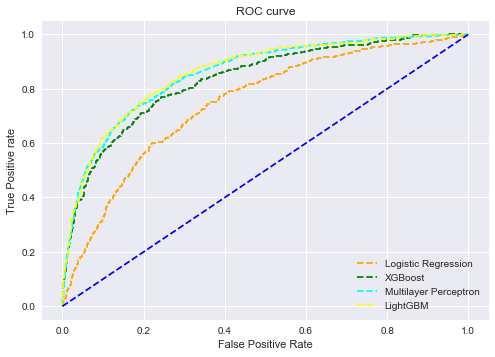

In [829]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='XGBoost')
plt.plot(fpr3, tpr3, linestyle='--',color='cyan', label='Multilayer Perceptron')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='LightGBM')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

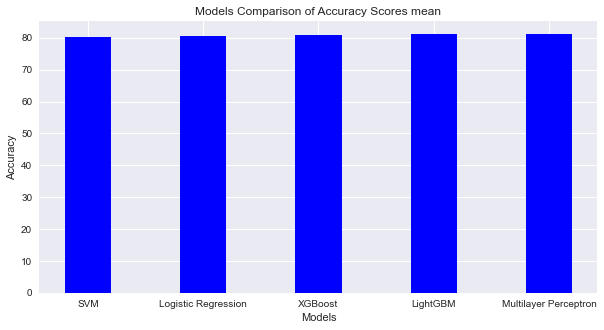

In [819]:
data = {'SVM':80.2, 'Logistic Regression':80.6, 'XGBoost':80.9,
        'LightGBM':81.2 ,'Multilayer Perceptron':81.1}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models Comparison of Accuracy Scores mean")
plt.show()

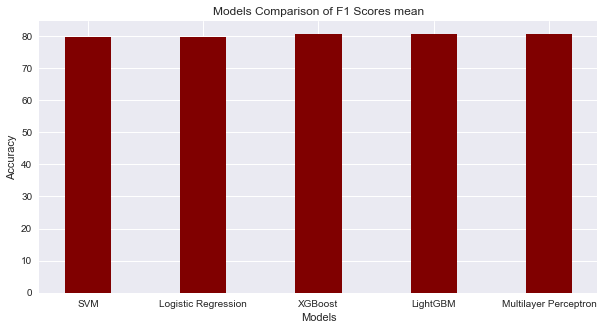

In [820]:
data = {'SVM':79.5, 'Logistic Regression':79.7, 'XGBoost':80.5,
        'LightGBM':80.6 ,'Multilayer Perceptron':80.6}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models Comparison of F1 Scores mean")
plt.show()